In [ ]:
import nltk
import random
from nltk.classify.scikitlearn import SklearnClassifier
import pickle
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from nltk.classify import ClassifierI
from statistics import mode
from nltk.tokenize import word_tokenize
import re
import os
import pandas as pd

In [ ]:
Pos = pd.read_csv("Pos.csv", header=None)
Neg = pd.read_csv("Neg.csv", header=None)



In [ ]:
Pos = Pos.drop(0, axis=0)
type(Pos)

pandas.core.frame.DataFrame

In [ ]:
Neg = Neg.drop(0, axis=0)
Neg

,0,1
1,Basically there's a family where a little boy ...,negative
2,"This show was an amazing, fresh & innovative i...",negative
3,Encouraged by the positive comments about this...,negative
4,Phil the Alien is one of those quirky films wh...,negative
5,I saw this movie when I was about 12 when it c...,negative
...,...,...
12521,After a long hard night being partied away at ...,negative
12522,"i think this one sucked on ice, because it lef...",negative
12523,I have seen this movie at the cinema many year...,negative
12524,This movie was a real torture fest to sit thro...,negative


In [ ]:
Pos = Pos[0:1000]
Neg = Neg[0:1000]
Pos

,0,1
1,One of the other reviewers has mentioned that ...,positive
2,A wonderful little production. <br /><br />The...,positive
3,I thought this was a wonderful way to spend ti...,positive
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
...,...,...
996,"Sharp, well-made documentary focusing on Mardi...",positive
997,I was just looking at the 100 bottom movies ac...,positive
998,The story in this movie is fairly implausible ...,positive
999,I saw this with few expectations and absolutel...,positive


In [ ]:
Pos = Pos.drop(1, axis=1)
Neg = Neg.drop(1, axis=1)

In [ ]:
Pos


,0
1,One of the other reviewers has mentioned that ...
2,A wonderful little production. <br /><br />The...
3,I thought this was a wonderful way to spend ti...
4,"Petter Mattei's ""Love in the Time of Money"" is..."
5,"Probably my all-time favorite movie, a story o..."
...,...
996,"Sharp, well-made documentary focusing on Mardi..."
997,I was just looking at the 100 bottom movies ac...
998,The story in this movie is fairly implausible ...
999,I saw this with few expectations and absolutel...


In [ ]:
all_words = []

from nltk.corpus import stopwords
import re


In [ ]:
import nltk
nltk.download('stopwords')
stop_words = list(set(stopwords.words("english")))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#adjectives are J, Verbs are v and adverbs are R, here we only need J
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

allowed_words = ["JJ"]

for index, p in Pos.iterrows():
  #documents.append((p, "Pos"))
  

#remove punctuations
  cleaned = re.sub(r"[^(a-zA-Z)\s]", "" , f"{p}")

  tokenized = word_tokenize(cleaned)

  stopped = []
  #remove stopwords
  stopped = [w for w in tokenized if not w in stop_words]
# it means the following simple code

  
#for w in tokenized:
#   if w not in stop_words:
#     stopped.append(w)
  partos = nltk.pos_tag(stopped)
  
  for w in partos:
    if w[1] in allowed_words:
      all_words.append(w[0])

all_words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


['wonderful',
 'little',
 'wonderful',
 'alltime',
 'favorite',
 'u',
 'original',
 'fantastic',
 'filmit',
 'first',
 'stunning',
 'little',
 'exotic',
 'significant',
 'u',
 'th',
 'real',
 'several',
 'low',
 'dtype',
 'fan',
 'epic',
 'Last',
 'hab',
 'library',
 'short',
 'impulse',
 'horrible',
 'remarkable',
 'melodr',
 'outstanding',
 'second',
 'French',
 'brilliant',
 'intriguing',
 'nigh',
 'short',
 'comic',
 'mid',
 'dtype',
 'young',
 'wartime',
 'first',
 'depict',
 'dtype',
 'young',
 'unforgettable',
 'great',
 'read',
 'wish',
 'little',
 'episode',
 'mislike',
 'keep',
 'rigid',
 'historical',
 'brilliant',
 'new',
 'silly',
 'last',
 'ni',
 'real',
 'English',
 'British',
 'dtype',
 'short',
 'Nice',
 'cool',
 'red',
 'main',
 'hopeless',
 'Reese',
 'big',
 'western',
 'dtype',
 'terrific',
 'lengthy',
 'Iranian',
 'documentary',
 'watch',
 'documentary',
 'famous',
 'illegal',
 'sic',
 'many',
 'dtype',
 'last',
 'perfect',
 'great',
 'small',
 'witty',
 'funny',
 

In [ ]:
print(len(all_words))

743


In [ ]:

for index, p in Neg.iterrows():
  #documents.append((p, "Pos"))
  

#remove punctuations
  cleaned = re.sub(r"[^(a-zA-Z)\s]", "" , f"{p}")

  tokenized = word_tokenize(cleaned)

  stopped = []
  #remove stopwords
  stopped = [w for w in tokenized if not w in stop_words]
# it means the following simple code

  
#for w in tokenized:
#   if w not in stop_words:
#     stopped.append(w)
  partos = nltk.pos_tag(stopped)
  
  for w in partos:
    if w[1] in allowed_words:
      all_words.append(w[0])

all_words

['wonderful',
 'little',
 'wonderful',
 'alltime',
 'favorite',
 'u',
 'original',
 'fantastic',
 'filmit',
 'first',
 'stunning',
 'little',
 'exotic',
 'significant',
 'u',
 'th',
 'real',
 'several',
 'low',
 'dtype',
 'fan',
 'epic',
 'Last',
 'hab',
 'library',
 'short',
 'impulse',
 'horrible',
 'remarkable',
 'melodr',
 'outstanding',
 'second',
 'French',
 'brilliant',
 'intriguing',
 'nigh',
 'short',
 'comic',
 'mid',
 'dtype',
 'young',
 'wartime',
 'first',
 'depict',
 'dtype',
 'young',
 'unforgettable',
 'great',
 'read',
 'wish',
 'little',
 'episode',
 'mislike',
 'keep',
 'rigid',
 'historical',
 'brilliant',
 'new',
 'silly',
 'last',
 'ni',
 'real',
 'English',
 'British',
 'dtype',
 'short',
 'Nice',
 'cool',
 'red',
 'main',
 'hopeless',
 'Reese',
 'big',
 'western',
 'dtype',
 'terrific',
 'lengthy',
 'Iranian',
 'documentary',
 'watch',
 'documentary',
 'famous',
 'illegal',
 'sic',
 'many',
 'dtype',
 'last',
 'perfect',
 'great',
 'small',
 'witty',
 'funny',
 

In [ ]:
type(all_words)

list

In [ ]:
while 'dtype' in all_words:
    all_words.remove('dtype')


In [ ]:
print(len(all_words))

1390


In [ ]:
all_words = nltk.FreqDist(all_words)
all_words

FreqDist({'good': 42, 'great': 35, 'many': 35, 'bad': 32, 'first': 26, 'much': 24, 'little': 20, 'big': 17, 'last': 15, 'funny': 15, ...})

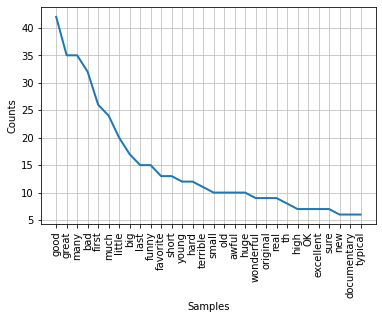

In [ ]:
import matplotlib.pyplot as plt
all_words.plot(30,cumulative=False)
plt.show()

In [ ]:
#listing the 100 most frequent features
word_features = list(all_words.keys())[:1000]
word_features

['wonderful',
 'little',
 'alltime',
 'favorite',
 'u',
 'original',
 'fantastic',
 'filmit',
 'first',
 'stunning',
 'exotic',
 'significant',
 'th',
 'real',
 'several',
 'low',
 'fan',
 'epic',
 'Last',
 'hab',
 'library',
 'short',
 'impulse',
 'horrible',
 'remarkable',
 'melodr',
 'outstanding',
 'second',
 'French',
 'brilliant',
 'intriguing',
 'nigh',
 'comic',
 'mid',
 'young',
 'wartime',
 'depict',
 'unforgettable',
 'great',
 'read',
 'wish',
 'episode',
 'mislike',
 'keep',
 'rigid',
 'historical',
 'new',
 'silly',
 'last',
 'ni',
 'English',
 'British',
 'Nice',
 'cool',
 'red',
 'main',
 'hopeless',
 'Reese',
 'big',
 'western',
 'terrific',
 'lengthy',
 'Iranian',
 'documentary',
 'watch',
 'famous',
 'illegal',
 'sic',
 'many',
 'perfect',
 'small',
 'witty',
 'funny',
 'awesome',
 'unique',
 'comple',
 'bit',
 'enjoyed',
 'high',
 'late',
 'good',
 'believe',
 'laugh',
 'loud',
 'elvira',
 'intelligent',
 'enough',
 'endless',
 'memorable',
 'nice',
 'romantic',
 'r

In [ ]:
Posi = pd.read_csv("Pos.csv")
Negi = pd.read_csv("Neg.csv")
Posi = Posi[0:1000]
Negi = Negi[0:1000]

Posits = [tuple(x) for x in Posi.values]
all = [tuple(y) for y in Negi.values]
all.extend(Posits)
all

In [ ]:
def find_features(documents):
  words = word_tokenize(documents)
  features = {}
  for w in word_features:
    features[w] = (w in words)
  return features

featureset = [(find_features(rev), cat) for (rev,cat) in all]

random.shuffle(featureset)

training_set = featureset[:800]
test_set = featureset[800:]

In [ ]:
type(training_set)

list

In [ ]:
featureset[1]

In [ ]:
classifier = nltk.NaiveBayesClassifier.train(training_set)
print("Accuracy Rate is:",(nltk.classify.accuracy(classifier,test_set)*100))

classifier.show_most_informative_features(15)


Accuracy Rate is: 78.25
Most Informative Features
                      OK = True           negati : positi =     10.6 : 1.0
                terrific = True           positi : negati =     10.0 : 1.0
                   solid = True           positi : negati =      9.3 : 1.0
                   worst = True           negati : positi =      8.4 : 1.0
                   awful = True           negati : positi =      8.0 : 1.0
                    dumb = True           negati : positi =      7.4 : 1.0
               excellent = True           positi : negati =      7.4 : 1.0
                  stupid = True           negati : positi =      6.9 : 1.0
             outstanding = True           positi : negati =      6.6 : 1.0
               brilliant = True           positi : negati =      6.3 : 1.0
                 unusual = True           positi : negati =      5.9 : 1.0
             intelligent = True           positi : negati =      5.2 : 1.0
                 perfect = True           positi :

In [ ]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn import metrics

In [ ]:
MNB_clf = SklearnClassifier(MultinomialNB())
mnb_cls = MNB_clf.train(training_set)

print("Accuracy Rate is:",(nltk.classify.accuracy(mnb_cls,test_set)*100))

Accuracy Rate is: 76.66666666666667


In [ ]:
BNB_clf = SklearnClassifier(BernoulliNB())
bnb_cls = BNB_clf.train(training_set)

print("Accuracy Rate is:",(nltk.classify.accuracy(bnb_cls,test_set)*100))

Accuracy Rate is: 78.91666666666667


In [ ]:
LogReg_clf = SklearnClassifier(LogisticRegression())
logreg_cls = LogReg_clf.train(training_set)

print("Accuracy Rate is:",(nltk.classify.accuracy(logreg_cls,test_set)*100))

Accuracy Rate is: 74.58333333333333


In [ ]:
SGD_clf = SklearnClassifier(SGDClassifier())
sgd_cls = SGD_clf.train(training_set)

print("Accuracy Rate is:",(nltk.classify.accuracy(sgd_cls,test_set)*100))

Accuracy Rate is: 71.16666666666667


In [ ]:
SVC_clf = SklearnClassifier(SVC())
svc_cls = SVC_clf.train(training_set)

print("Accuracy Rate is:",(nltk.classify.accuracy(svc_cls,test_set)*100))

Accuracy Rate is: 73.33333333333333
